In [38]:
import numpy as np
import matplotlib.pyplot as plt



Text(0.5, 0, 'V')

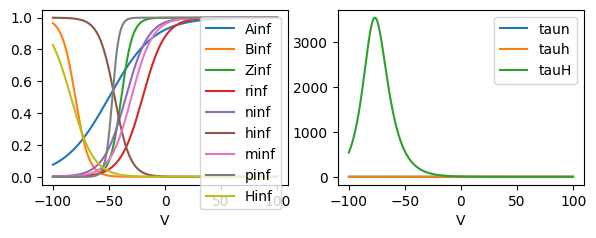

In [39]:
#gating varibles
tauq0 = 200
#Ca_acum=0.0001
aq=2
def minf(V):
    return 1.0/(1+np.exp(-(V--30)/9.5))
# def taum(V):
#     return 1/(0.1*(V+31)/(1-np.exp(-0.1*(V+31)))+4*np.exp(-(V+56)/18))
def hinf(V):
    return  1.0/(1+np.exp(-(V--45)/-7))
def tauh(V):
    return 0.1 + 0.75*(1.0/(1+np.exp(-(V--40.5)/-6)))
def ninf(V):
    return 1.0/(1+np.exp(-(V--35)/10))
def taun(V):
    return 0.1 + 0.5*(1.0/(1+np.exp(-(V--27)/-15)))
def pinf(V):
    return 1.0/(1+np.exp(-(V--47)/3))#can range from -47 to -41 #
# def qinf(V):
#     return 1/(1+np.exp(-(V+35)/6.5))
# def tauq(V):
#     return tauq0/(np.exp(-(V+55)/30)+np.exp((V+55)/30))
# def mMinf(V):
#     return 1 / (1 + np.exp(-(V + 35) / 10))
# def tau_mM(V):
#     return 400 / (3.3*np.exp((V+35)/20)+ np.exp(-(V+35)/20))
def rinf(V):
    return 1/ (1 + np.exp(-(V--20)/10))
# def taur(V):
#     return 1/(0.1*(V+40)/(1-np.exp(-(V+40)/10))*4*np.exp(-(V+65)/18))
def Zinf(V):
    return 1.0/(1+np.exp(-(V--39)/5))
def Ainf(V):
    return 1.0/(1+np.exp(-(V--50)/20))
def Binf(V):
    return 1.0/(1+np.exp(-(V--80)/-6))
def Hinf(V):
    return 1./(1. + np.exp((V + 84.)/10.2))
def tauH(V):
    return  1./(np.exp(-17.9 - 0.116*V ) + np.exp(-1.84 + 0.09*V )) + 0.1
def cinf(V):
    return  1.0/(1+np.exp(-(V--30)/7))
def dinf(Ca_acum):
    return 1.0/(1+6/Ca_acum)
def Qinf(Ca_acum):
    return 1.0/(1+(aq**4)/(Ca_acum**4))


vv = np.arange(-100,100 , 0.1)
fig = plt.figure(figsize=(7, 5))
gs = mpl.gridspec.GridSpec(2, 2, height_ratios=[1, 1])
ax = plt.subplot(gs[0])
plt.plot(vv,Ainf(vv),label = "Ainf")
plt.plot(vv,Binf(vv),label = "Binf")
plt.plot(vv,Zinf(vv),label = "Zinf")
plt.plot(vv,rinf(vv),label = "rinf")
plt.plot(vv,ninf(vv), label = "ninf")
plt.plot(vv,hinf(vv), label = "hinf")
plt.plot(vv,minf(vv), label = "minf")
#plt.plot(vv,qinf(vv), label = "qinf")
plt.plot(vv,pinf(vv), label = "pinf")
#plt.plot(vv,mMinf(vv), label = "mMinf")
plt.plot(vv,Hinf(vv), label = "Hinf")
plt.legend(loc='upper right')
plt.xlabel("V")

ax = plt.subplot(gs[1])
#plt.plot(vv,taur(vv), label = "taur")
plt.plot(vv,taun(vv), label = "taun")
plt.plot(vv,tauh(vv), label = "tauh")
#plt.plot(vv,taum(vv), label = "taum")
#plt.plot(vv,tauq(vv), label = "tauq")
#plt.plot(vv,tau_mM(vv), label = "taumM")
plt.plot(vv,tauH(vv), label = "tauH")


plt.legend(loc='upper right')
#plt.plot(vv,taup(vv))
#plt.plot(vv,tau_mM(vv))
plt.xlabel("V")



In [40]:
import numpy as np
import scipy.stats as spstats
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def piecewise_constant_white_noise(t, Tdur, D):
    eta = np.random.randn(len(t))
    Ieta = np.zeros(len(t))
    for i in range(len(t)):
        Ieta[i] = eta[int(t[i] / Tdur)]
    return np.sqrt(D) * Ieta


def simulated_sinusoidal_input(amplitude, frequency, t):
    return amplitude * np.sin(2 * np.pi * frequency * t)

# Poisson Input
def poisson_input(r, dt):
    return 1 * (np.random.rand() < r * 10**-3 * dt)

# ZAP Input
def zap_input(i, Fzap, dt):
    return np.sin(2 * np.pi * Fzap * 10**-3 * i * dt + 3 * np.pi / 2)


def syn_current(duration=10000 ,dt=0.1, t_on=10, curr_level=0.1, pulse_duration=1,D=1, Tdur = 1 ):
    V0 = -70  # Initial voltage

    duration = duration
    frequency = .08
    t_off = duration - t_on
    #t_off = 3350
    #t = np.arange(0, duration + dt, dt)
    t = np.arange(0, duration, dt)[:duration]
    noise = piecewise_constant_white_noise(t, Tdur, D)
    #Amp = 0.0
    N = len(t)
    A_soma = np.pi * ((70.0 * 1e-4) ** 2)

    poisson_rate = 1000  # Rate for Poisson input in Hz

    I_poisson = np.array([poisson_input(poisson_rate, dt) for _ in range(N)])
    
    I_theta = np.array([zap_input(i, 8, dt) for i in range(N)])
    I_gamma = np.array([zap_input(i, 60,  dt) for i in range(N)])
    
    #I = I_poisson + I_zap  # Combined input
    
    #I = I_poisson + I_zap
    # External current
    A_soma = np.pi * ((70.0 * 1e-4) ** 2)  # cm2
    #I = np.zeros(len(t))
    # omega = 2 * np.pi * frequency
    # #I = (curr_level * np.sin(omega * t))/A_soma
    #I[int(np.round(t_on / dt)) : int(np.round(t_off / dt))] = curr_level /A_soma  # muA/cm


    # #I = Vm_trace1
    # #I = np.full(len(t), curr_level / A_soma)  # Set current to a constant value across all t
    noise = piecewise_constant_white_noise(t, Tdur, D)
    noise_mean = np.mean(noise)
    noise_std = np.std(noise)
    norm_noise = (noise - noise_mean)/noise_std
    I = norm_noise 
    #I += noise
    #I = Vm_trace1
    #X = (curr_level*opto_signal_trial)/A_soma


    return I, t_on, t_off, dt, t, A_soma,I_gamma,I_theta



def HHsimulator(V0, params, dt, t, I,I_gamma,I_theta):

    Gna = params[0, 0]  # mS/cm2
    Gna.astype(float)
    Gk = params[0, 1]  # mS/cm2
    Gk.astype(float)
    Gl = params[0, 2]  # mS/cm2
    Gl.astype(float)
    Gnap = params[0, 3]  # mS/cm2
    Gnap.astype(float)
    Ga = params[0, 4]  # mS/cm2
    Ga.astype(float)
    Gca = params[0, 5]  # mS/cm2
    Gca.astype(float)
    Gc = params[0, 6]  # mS/cm2
    Gc.astype(float)
    Gsahp = params[0, 7]  # mS/cm2
    Gsahp.astype(float)
    Gh = params[0, 8]  # mS/cm2
    Gh.astype(float)
    Gm = params[0, 9]  # mS/cm2
    Gm.astype(float)
    El = params[0, 10]  # mS/cm2
    El.astype(float)
    Ena = params[0, 11]  # mS/cm2
    Ena.astype(float)
    Ek = params[0, 12]  # mS/cm2
    Ek.astype(float)
    Eca = params[0, 13]  # mS/cm2
    Eca.astype(float)
    Eh = params[0, 14]  # mS/cm2
    Eh.astype(float)
    Gl2 = params[0, 15]  # mS/cm2
    Gl2.astype(float)
    Amp_Gamma = params[0, 16]  # mS/cm2
    Amp_Gamma.astype(float)
    Amp_Theta = params[0, 17]  # mS/cm2
    Amp_Theta.astype(float)



    # fixed parameters

    phih = 1
    phin=1
    phiq=1

    Gc1 = 1;
    p = .15;

    Cm=1
    #Gl=0.05
    #El=-70
    #Gna = 35
    #Gnap = 0.3
    #Ena = 55
    #Ek =-90
    #Ga=1.4
    #Gm =1
    #Gca =0
    #Gc=10
    #Gsahp=5
    #Eca=120
    #Gh=2
    #Eh=-32.9
    # Eh = 40
    #Gna = 35
    #Gk = 6




    #Gsd = Gc1/p;
    #Gds = Gc1/(1-p);

    Gsd =.2
    Gds=.2
    #Gnd= 0.2
    tstep = float(dt)


    Iapp = 0.9
    Inoise = 0.0
    Iapp2 = 0.9

    D = 1
    Tdur = 1

    noise = piecewise_constant_white_noise(t, Tdur, D)
#numerical solution

    Vs = np.zeros(len(t))
    Vd = np.zeros(len(t))
    Vn = np.zeros(len(t))
    h = np.zeros(len(t))
    n = np.zeros(len(t))
    q = np.zeros(len(t))
    mM = np.zeros(len(t))
    hH = np.zeros(len(t))
    mM2 = np.zeros(len(t))
    hH2 = np.zeros(len(t))
    r = np.zeros(len(t))
    Z = np.zeros(len(t))
    B = np.zeros(len(t))
    H = np.zeros(len(t))
    C = np.zeros(len(t))
    Q = np.zeros(len(t))
    Ca_acum = np.zeros(len(t))
    Ca_acum[0] = 0.0001

    Vs[0] = -70
    Vd[0] = -70
    #Vn[0] = El

    for j in range(len(t) - 1):
        
        ###Complex Bursting Model
        k1vs = (-Gl*(Vs[j]-El)-Gna*(minf(Vs[j])**3)*h[j]*(Vs[j]-Ena)-Gnap*pinf(Vs[j])*(Vs[j]-Ena)
        -Gk*(n[j]**4)*(Vs[j]-Ek)-Ga*(Ainf(Vs[j])**3)*B[j]*(Vs[j]-Ek)-Gm*Z[j]*(Vs[j]-Ek)- Gca*(r[j]**2)*(Vs[j]-Eca)
        -Gc*dinf(Ca_acum[j])*C[j]*(Vs[j]-Ek)-Gsahp*Q[j]*(Vs[j]-Ek)-Gsd*(Vs[j]-Vd[j]+Amp_Theta*I_theta[j]+Amp_Gamma*I_gamma[j]))/Cm

        #k1vn = (-Gl*(Vn[j]-El)-Ghn*H[j]*(Vn[j]-Eh)-Gnapn*pinf(Vs[j])**3*(Vs[j]-Ena)- Gds*(Vn[j]-Vs[j]) - Gnd*(Vn[j]-Vd[j]) )/Cm;
        
        k1vd = (-Gl2*(Vd[j]-El)-Gh*H[j]*(Vd[j]-Eh)-Gds*(Vd[j]-Vs[j]+Amp_Theta*I_theta[j]+Amp_Gamma*I_gamma[j]))/Cm;


        k1h = (hinf(Vs[j])-h[j])/tauh(Vs[j]);
        k1n = (ninf(Vs[j])-n[j])/taun(Vs[j]);
        k1r = (rinf(Vs[j])-r[j])/1;
        k1Z = (Zinf(Vs[j])-Z[j])/75;
        k1B = (Binf(Vs[j])-B[j])/15;
        k1H = (Hinf(Vd[j])-H[j])/tauH(Vd[j])
        k1C = (cinf(Vs[j])-C[j])/2
        kCa_acum = -0.13*(Gca*(r[j]**2)*(Vs[j]-Eca))-Ca_acum[j]/13
        k1Q = (Qinf(Ca_acum[j])-Q[j])/450

        avs = Vs[j]+k1vs*tstep;
        avd = Vd[j]+k1vd*tstep;
        #avn = Vn[j] + k1vn * tstep
        ah = h[j]+k1h*tstep;
        an = n[j]+k1n*tstep;
        ar = r[j]+k1r*tstep;
        aZ = Z[j]+k1Z*tstep;
        aB = B[j]+k1B*tstep;
        aH = H[j]+k1H*tstep;
        aC = C[j]+k1C*tstep;
        aQ = Q[j]+k1Q*tstep;
        aCa = Ca_acum[j]+kCa_acum*tstep

        ###Complex Bursting Model
        k2vs = (-Gl*(avs-El)-Gna*(minf(avs)**3)*ah*(avs-Ena)-Gnap*pinf(avs)*(avs-Ena)
        -Gk*(an**4)*(avs-Ek)-Gm*aZ*(avs-Ek)-Ga*(Ainf(avs)**3)*aB*(avs-Ek)- Gca*(ar**2)*(avs-Eca)
        -Gc*dinf(aCa)*aC*(avs-Ek)-Gsahp*aQ*(avs-Ek)-Gsd*(avs-avd)+Amp_Theta*I_theta[j]+Amp_Gamma*I_gamma[j])/Cm

        #k2vn = (-Gl*(avd-El)-Ghn*aH*(avd-Eh)-Gnapn*pinf(avs)**3*(avs-Ena)-Gds*(avn-avs)-Gnd*(avn-avd))/Cm;

        k2vd = (-Gl2*(avd-El)-Gh*aH*(avd-Eh)-Gds*(avd-avs)+Amp_Theta*I_theta[j]+Amp_Gamma*I_gamma[j])/Cm;

        k2h = (hinf(avs)-ah)/tauh(avs)
        k2n = (ninf(avs)-an)/taun(avs)
        k2r = (rinf(avs)-ar)/1
        k2Z = (Zinf(avs)-aZ)/75;
        k2B = (Binf(avs)-aB)/15;
        k2H = (Hinf(avd)-aH)/tauH(avd)
        k2C = (cinf(avs)-aC)/2;
        kCa_acum2 = -0.13*(Gca*(ar**2)*(avs-Eca))-aCa/13
        k2Q = (Qinf(aCa)-aQ)/450;

        Vs[j+1] = Vs[j]+(k1vs+k2vs)*tstep/2
        Vd[j+1] = Vd[j]+(k1vd+k2vd)*tstep/2
        #Vn[j + 1] = Vn[j] + (k1vn + k2vn) * tstep / 2
        h[j+1] = h[j]+(k1h+k2h)*tstep/2
        n[j+1] = n[j]+(k1n+k2n)*tstep/2
        r[j+1] = r[j]+(k1r+k2r)*tstep/2
        Z[j+1] = Z[j]+(k1Z+k2Z)*tstep/2
        B[j+1] = B[j]+(k1B+k2B)*tstep/2
        H[j+1] = H[j]+(k1H+k2H)*tstep/2
        C[j+1] = C[j]+(k1C+k2C)*tstep/2
        Q[j+1] = Q[j]+(k1Q+k2Q)*tstep/2
        Ca_acum[j+1] = Ca_acum[j]+(kCa_acum+kCa_acum2)*tstep/2
        
        #Z-Score Normalization
        mean_Vs = np.mean(Vs)
        std_Vs = np.std(Vs)
        norm_Vs = (Vs-mean_Vs)/std_Vs
    
    return np.array(norm_Vs).reshape(-1, 1)


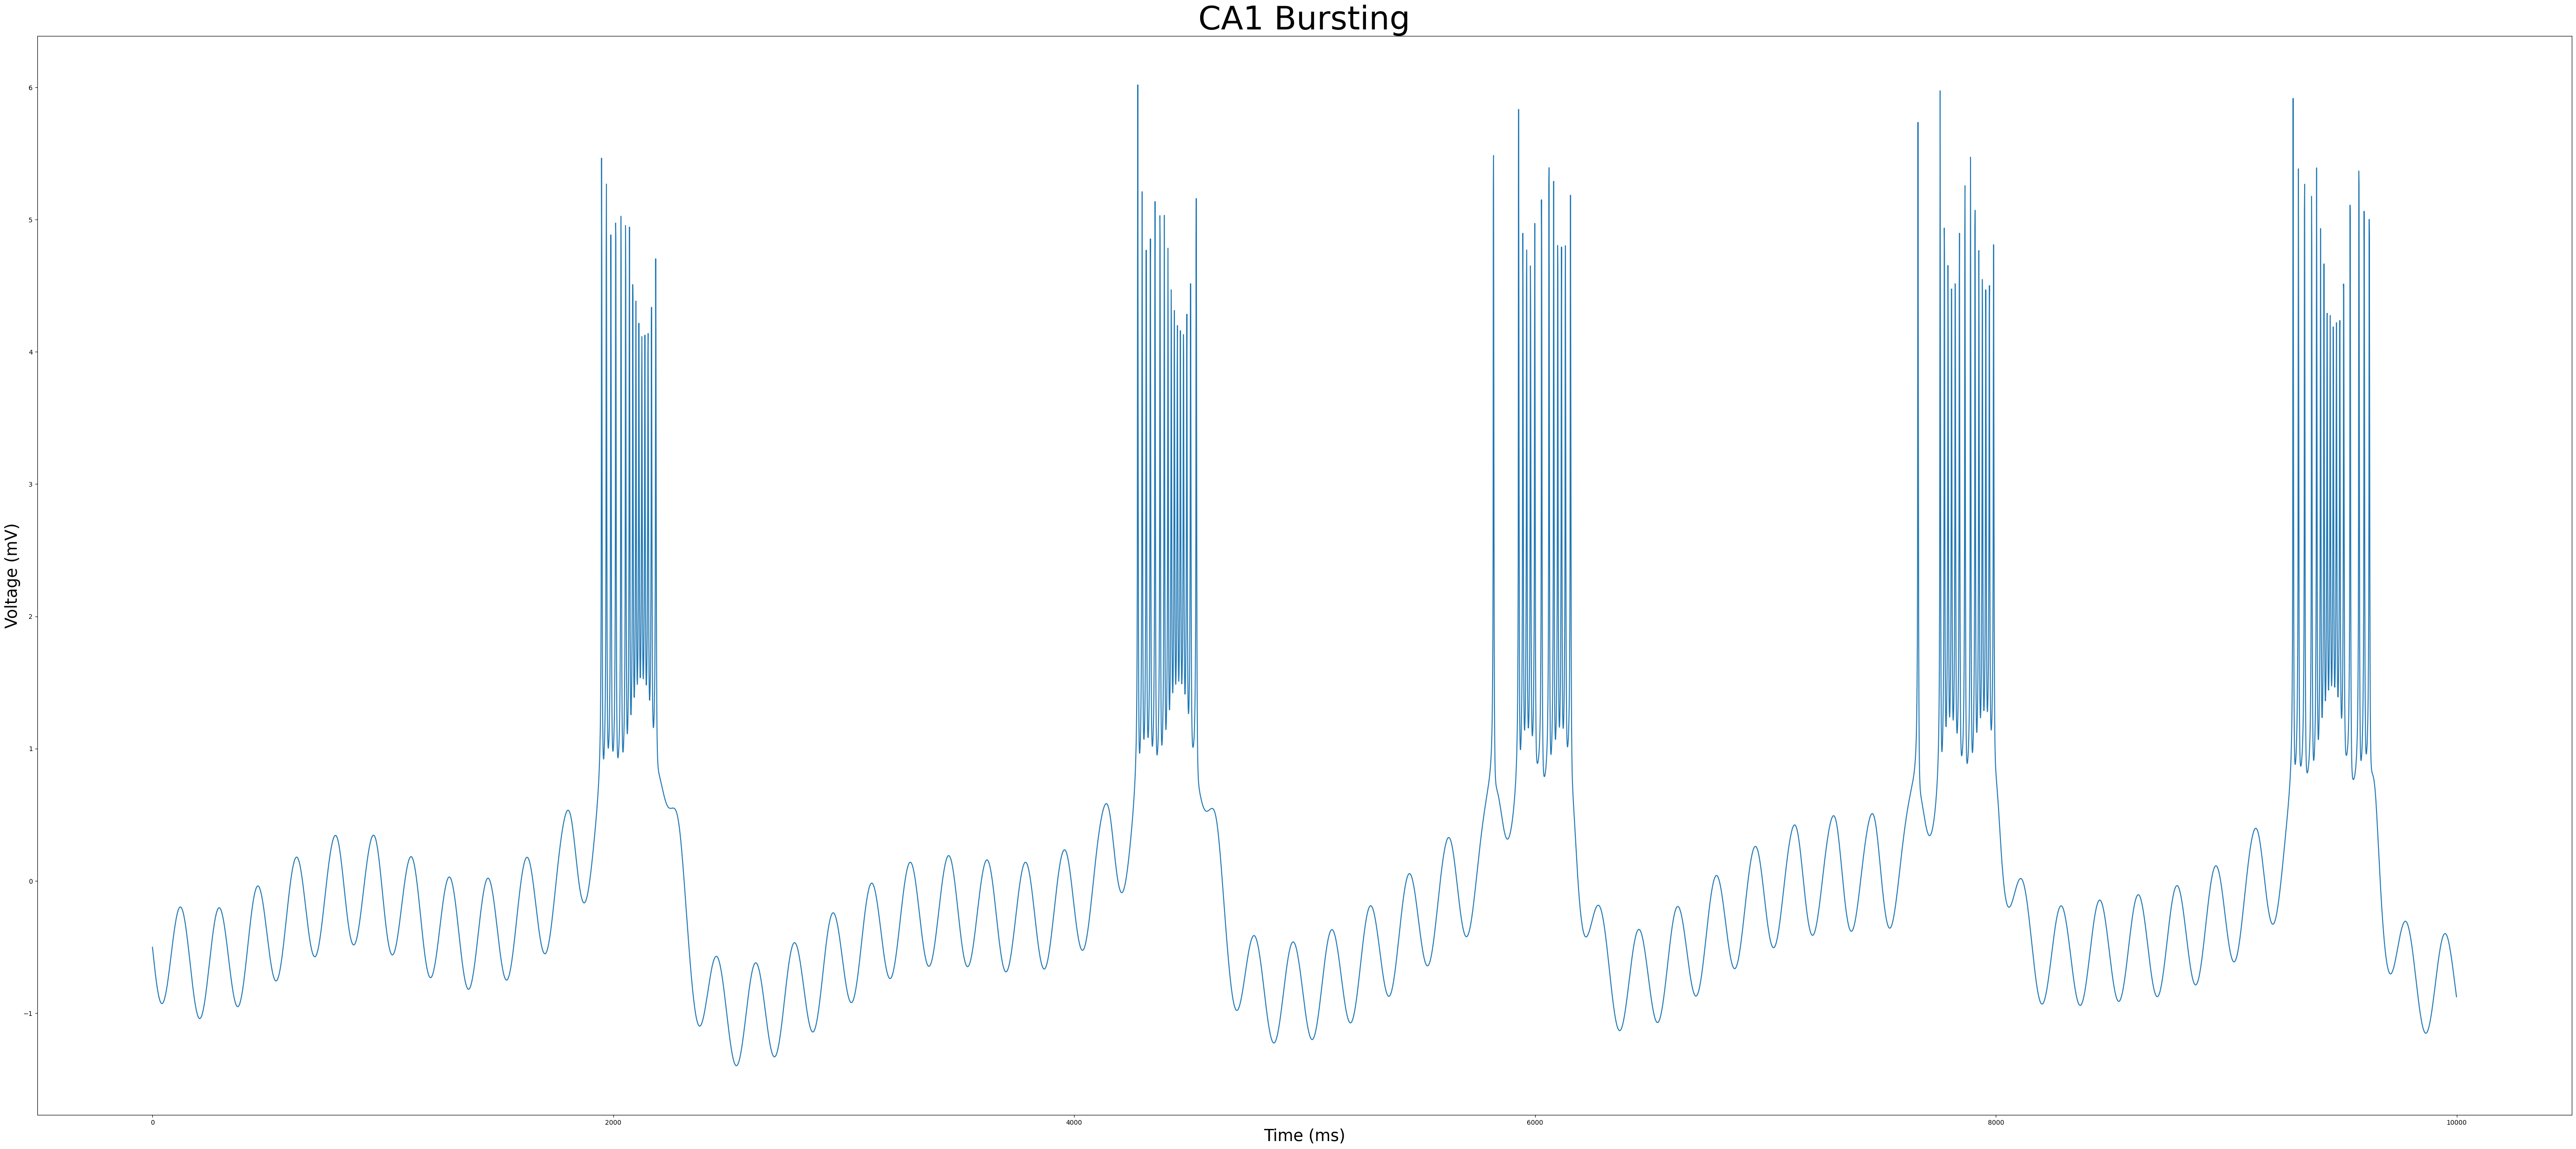

In [49]:


params = np.array([[35,6,0.05,0.3,1.4,0,10,5,2,1,-70,55,-90,120,-32.9,0.05,5,.5]])

V0 = -70  # Initial voltage

I, t_on, t_off, dt, t, A_soma ,I_gamma,I_theta = syn_current()

norm_Vs = HHsimulator(V0, params, dt, t, I,I_gamma,I_theta)
plt.figure(figsize=(70, 30)) 
plt.plot(norm_Vs)
plt.xlabel("Time (ms)",fontsize='25')
plt.ylabel("Voltage (mV)",fontsize='25')
plt.title("CA1 Bursting",fontsize='50')
plt.show()

